In [3]:
import pandas as pd

df = pd.read_csv("nacidos-vivos-registrados-2018_deis.csv")

df

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,34,Formosa,1,Simple,2,Mujer,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,5,2000 a 2499,3
1,2,Ciudad Aut. de Buenos Aires,1,Simple,1,Varón,7,40 a 44,6,37 a 41,3,Primaria/C. EGB Completa,6,2500 a 2999,13
2,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
3,82,Santa Fe,1,Simple,2,Mujer,6,35 a 39,6,37 a 41,7,Terciaria/Universitaria Comple,5,2000 a 2499,30
4,74,San Luis,1,Simple,1,Varón,6,35 a 39,5,32 a 36,5,Secundaria/Polimodal Completa,6,2500 a 2999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30094,18,Corrientes,1,Simple,1,Varón,9,Sin especificar,6,37 a 41,3,Primaria/C. EGB Completa,8,De 3500 y más,2
30095,34,Formosa,1,Simple,1,Varón,4,25 a 29,4,28 a 31,8,Sin especificar,8,De 3500 y más,1
30096,86,Santiago del Estero,1,Simple,2,Mujer,7,40 a 44,6,37 a 41,3,Primaria/C. EGB Completa,5,2000 a 2499,5
30097,6,Buenos Aires,2,Múltiple,9,Sin espeficar,4,25 a 29,8,Sin especificar,8,Sin especificar,9,Sin especificar,2


In [ ]:
df.describe() #muestra el analisis estadístico del df

Consulta 1: Edades de las madres por semanas de gestación

In [7]:
tabla1 = df[["edad_de_la_madre_grupos_nombre", "semanas_de_gestacion_nombre"]]
tabla1

,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre
0,25 a 29,32 a 36
1,40 a 44,37 a 41
2,30 a 34,Sin especificar
3,35 a 39,37 a 41
4,35 a 39,32 a 36
...,...,...
30094,Sin especificar,37 a 41
30095,25 a 29,28 a 31
30096,40 a 44,37 a 41
30097,25 a 29,Sin especificar


In [8]:
tabla1.head(10) #los primeros 10 resultados

,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre
0,25 a 29,32 a 36
1,40 a 44,37 a 41
2,30 a 34,Sin especificar
3,35 a 39,37 a 41
4,35 a 39,32 a 36
5,20 a 24,32 a 36
6,20 a 24,37 a 41
7,15 a 19,32 a 36
8,15 a 19,37 a 41
9,20 a 24,37 a 41


In [9]:
tabla1[tabla1["edad_de_la_madre_grupos_nombre"].str.contains("25 a 29")] #muestra las filas coincidentes

,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_nombre
0,25 a 29,32 a 36
12,25 a 29,32 a 36
18,25 a 29,37 a 41
19,25 a 29,32 a 36
20,25 a 29,37 a 41
...,...,...
30087,25 a 29,37 a 41
30093,25 a 29,37 a 41
30095,25 a 29,28 a 31
30097,25 a 29,Sin especificar


In [ ]:
Agrupando los datos de la tabla

In [17]:
tabla2 = tabla1.groupby("edad_de_la_madre_grupos_nombre").count()
tabla2

,semanas_de_gestacion_nombre
edad_de_la_madre_grupos_nombre,
15 a 19,3826
20 a 24,5360
25 a 29,5536
30 a 34,5426
35 a 39,4822
40 a 44,2915
De 45 y más,800
Menor de 15,659
Sin especificar,755


Grafica de la tabla agrupada

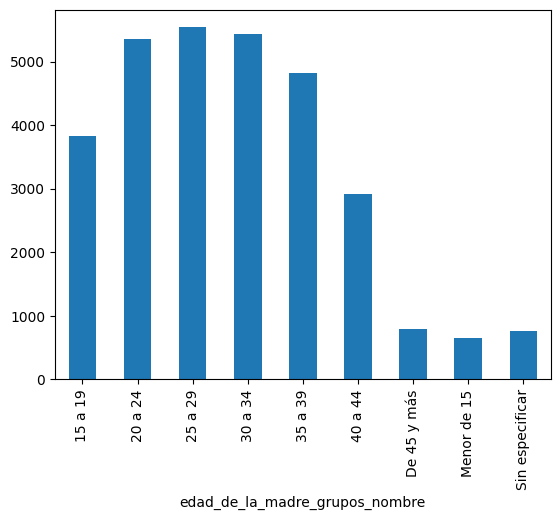

In [19]:
import matplotlib.pyplot as plt

#tabla2["semanas_de_gestacion_nombre"].plot() #hace un gráfico de lineas
tabla2["semanas_de_gestacion_nombre"].plot(kind="bar") #hace un gráfico de barras
plt.show()

Consulta 2: Tipo de parto por peso al nacer

In [29]:
tabla3 = df[["tipo_de_parto_nombre", "intervalos_de_peso_al_nacer_nombre"]]
tabla3.describe()

,tipo_de_parto_nombre,intervalos_de_peso_al_nacer_nombre
count,30099,30099
unique,3,9
top,Simple,2500 a 2999
freq,24693,6046


In [ ]:
Agrupando los datos y gráfica del resultado

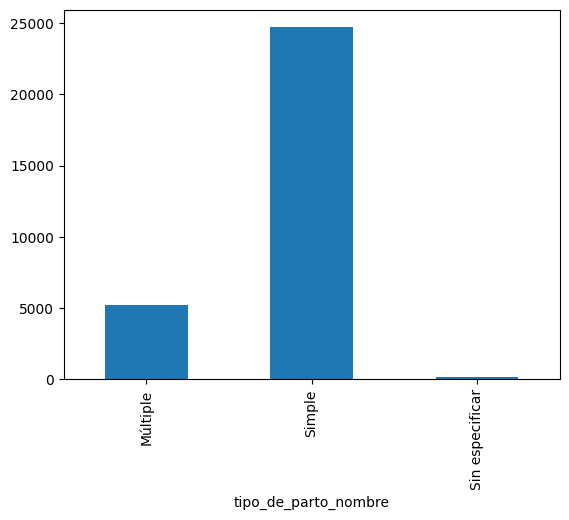

In [32]:
tabla4 = tabla3.groupby("tipo_de_parto_nombre").count()
tabla4["intervalos_de_peso_al_nacer_nombre"].plot(kind="bar") #hace un gráfico de barras
plt.show()